This notebook uses my implementation of a neural net to compare the performance of different optimization algorithms, namely:
- gradient descent (GD)
- GD with momentum
- RMSProp
- Adam

The network is required to perform binary classification.

In [17]:
import sklearn
import sklearn.datasets
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation

from neural_network import NeuralNetworkImpl
from utils import plot_decision_boundary, compute_accuracy

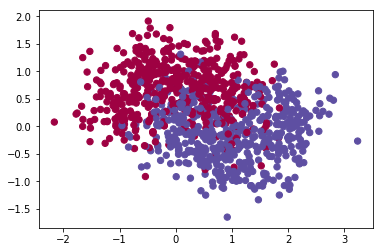

In [18]:
train_X, train_Y = sklearn.datasets.make_moons(n_samples=1000, noise=.4)
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
plt.show()
train_X = train_X.T
train_Y = train_Y.reshape((1, train_Y.shape[0]))

=== iteration 0, cost: 1.6141171809618962, accuracy: 0.46875
=== iteration 1000, cost: 0.38773049594387987, accuracy: 0.828125
=== iteration 2000, cost: 0.509168791715472, accuracy: 0.8125
=== iteration 3000, cost: 0.3516241380960389, accuracy: 0.84375
=== iteration 4000, cost: 0.31187475779927293, accuracy: 0.84375
=== iteration 5000, cost: 0.37314471506304797, accuracy: 0.828125
=== iteration 6000, cost: 0.4754537825653437, accuracy: 0.78125
=== iteration 7000, cost: 0.3961551216590602, accuracy: 0.828125
=== iteration 8000, cost: 0.3646501976144287, accuracy: 0.8125
=== iteration 9000, cost: 0.2150732379396086, accuracy: 0.9375


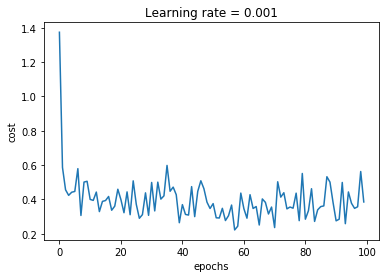

Neural net (sgd) model train accuracy: 0.8360000000000003


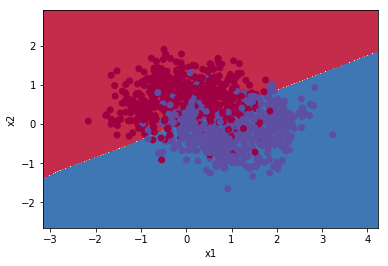

In [19]:
model_nn_sgd = NeuralNetworkImpl(layer_sizes=[5, 3, 1],
    layer_activations=['relu', 'relu', 'sigmoid'], alpha=0.001,
    epochs=10000, optimization_algorithm='sgd')
model_nn_sgd.train(train_X, train_Y)

accuracy = compute_accuracy(model_nn_sgd, train_X, train_Y)
print("Neural net (sgd) model train accuracy: {}".format(accuracy))
plot_decision_boundary(model_nn_sgd, train_X, train_Y)

=== iteration 0, cost: 1.2162503663135766, accuracy: 0.5625
=== iteration 1000, cost: 0.33750567949396715, accuracy: 0.859375
=== iteration 2000, cost: 0.3043807689677153, accuracy: 0.875
=== iteration 3000, cost: 0.3283309505065512, accuracy: 0.859375
=== iteration 4000, cost: 0.35922307018833005, accuracy: 0.859375
=== iteration 5000, cost: 0.37058402494678505, accuracy: 0.890625
=== iteration 6000, cost: 0.3080489487265856, accuracy: 0.90625
=== iteration 7000, cost: 0.39969824229406664, accuracy: 0.828125
=== iteration 8000, cost: 0.45000208242940226, accuracy: 0.78125
=== iteration 9000, cost: 0.30014233813375346, accuracy: 0.859375


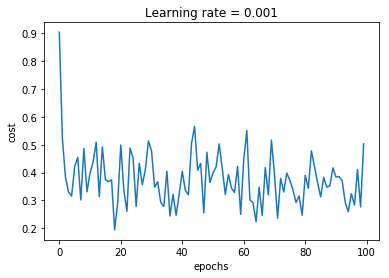

Neural net (momentum) model train accuracy: 0.8620000000000003


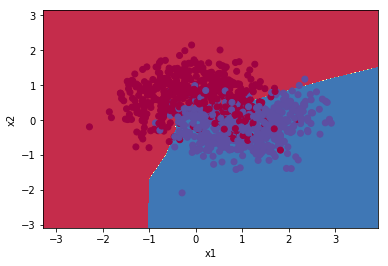

In [11]:
model_nn_mom = NeuralNetworkImpl(layer_sizes=[5, 3, 1],
    layer_activations=['relu', 'relu', 'sigmoid'], alpha=0.001,
    epochs=10000, mini_batch_size=64, optimization_algorithm='momentum')
model_nn_mom.train(train_X, train_Y)

accuracy = compute_accuracy(model_nn_mom, train_X, train_Y)
print("Neural net (momentum) model train accuracy: {}".format(accuracy))
plot_decision_boundary(model_nn_mom, train_X, train_Y)

=== iteration 0, cost: 1.2162503663135766, accuracy: 0.5625
=== iteration 1000, cost: 0.25408785204626333, accuracy: 0.890625
=== iteration 2000, cost: 0.2628591787372659, accuracy: 0.90625
=== iteration 3000, cost: 0.21712561451578388, accuracy: 0.921875
=== iteration 4000, cost: 0.2893028893630178, accuracy: 0.859375
=== iteration 5000, cost: 0.3003167790621004, accuracy: 0.890625
=== iteration 6000, cost: 0.21788447560580135, accuracy: 0.953125
=== iteration 7000, cost: 0.3130555982579666, accuracy: 0.84375
=== iteration 8000, cost: 0.41464503989961493, accuracy: 0.828125
=== iteration 9000, cost: 0.31873264678472624, accuracy: 0.875


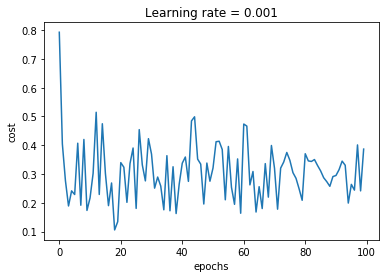

Neural net (rmsprop) model train accuracy: 0.8800000000000003


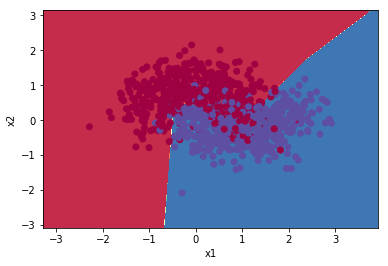

In [12]:
model_nn_rmsprop = NeuralNetworkImpl(layer_sizes=[5, 3, 1],
    layer_activations=['relu', 'relu', 'sigmoid'], alpha=0.001,
    epochs=10000, mini_batch_size=64, optimization_algorithm='rmsprop')
model_nn_rmsprop.train(train_X, train_Y)

accuracy = compute_accuracy(model_nn_rmsprop, train_X, train_Y)
print("Neural net (rmsprop) model train accuracy: {}".format(accuracy))
plot_decision_boundary(model_nn_rmsprop, train_X, train_Y)

=== iteration 0, cost: 1.2162503663135766, accuracy: 0.5625
=== iteration 1000, cost: 0.24198767973048732, accuracy: 0.90625
=== iteration 2000, cost: 0.2511348173872393, accuracy: 0.90625
=== iteration 3000, cost: 0.21110473988990489, accuracy: 0.921875
=== iteration 4000, cost: 0.27974670199618473, accuracy: 0.875
=== iteration 5000, cost: 0.29815137570879424, accuracy: 0.890625
=== iteration 6000, cost: 0.21890248370722645, accuracy: 0.9375
=== iteration 7000, cost: 0.30211289333868535, accuracy: 0.84375
=== iteration 8000, cost: 0.4194087212640877, accuracy: 0.796875
=== iteration 9000, cost: 0.31457625563471747, accuracy: 0.875


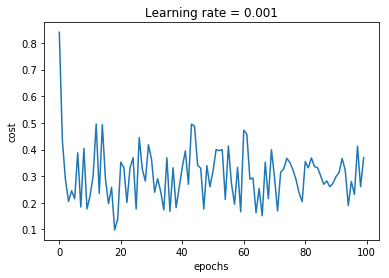

Neural net (adam) model train accuracy: 0.8830000000000003


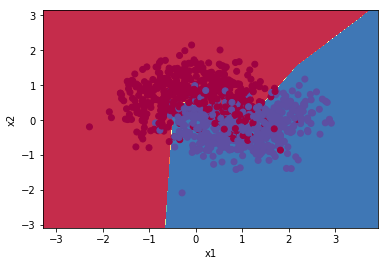

In [16]:
model_nn_adam = NeuralNetworkImpl(layer_sizes=[5, 3, 1],
    layer_activations=['relu', 'relu', 'sigmoid'], alpha=0.001,
    epochs=10000, mini_batch_size=64, optimization_algorithm='adam')
model_nn_adam.train(train_X, train_Y)

accuracy = compute_accuracy(model_nn_adam, train_X, train_Y)
print("Neural net (adam) model train accuracy: {}".format(accuracy))
plot_decision_boundary(model_nn_adam, train_X, train_Y)

In [14]:
# Compare the results with a Keras model using Adam
model = Sequential()
model.add(Dense(5, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(train_X.T, np.squeeze(train_Y), epochs=10000, batch_size=64, verbose=0)
score = model.evaluate(train_X.T, np.squeeze(train_Y), batch_size=64)
print("\nKeras NN loss/accuracy:")
for label, value in zip(model.metrics_names, score):
    print("{}: {}".format(label, value))

  64/1000 [>.............................] - ETA: 0s
Keras NN loss/accuracy:
loss: 0.30106549882888795
acc: 0.8740000009536744
